Test Accuracy: 0.81875
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       149
           1       0.83      0.82      0.83       171

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



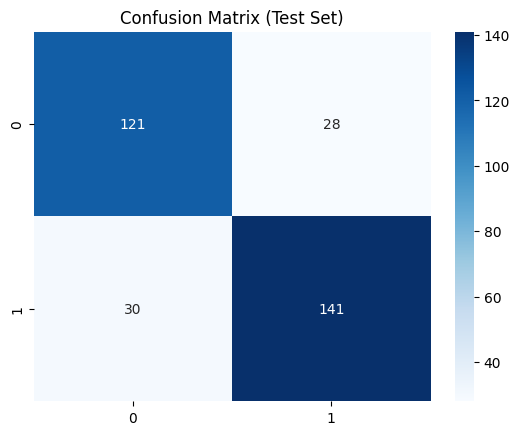

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split

# Load processed data
data = pd.read_csv("../data/winequality_processed.csv")

X = data.drop('quality_label', axis=1)
y = data['quality_label']

# Recreate the same train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Load trained model
best_model = joblib.load("../data/best_model.pkl")

# Predict ONLY on unseen test data
y_pred_test = best_model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [2]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = best_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

print("ROC AUC:", auc)


ROC AUC: 0.9065308685584207
